In [7]:
###Imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import time

In [8]:
###Load Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### Feature Engineering

In [15]:
#Transform date column to datetime format
train["datetime"] = pd.to_datetime(train["datetime"])

In [16]:
#Create column for weekend
train.loc[(train["datetime"].apply(lambda x: x.weekday() > 4)), "weekend"] = 1
train.loc[(train["datetime"].apply(lambda x: x.weekday() <= 4)), "weekend"] = 0

In [17]:
#Create time columns
train["hour"] = train["datetime"].dt.hour
train["day"] = train["datetime"].dt.day
train["month"] = train["datetime"].dt.month
train["year"] = train["datetime"].dt.year
train["yday"] = train["datetime"].dt.dayofyear

### Data Exploration 

In [18]:
#Relevant Categories
cats = [
    "season",
    "holiday",
    "workingday",
    "weather",
    "temp",
    "atemp",
    "humidity",
    "windspeed",
    "weekend",
    "hour",
    "day",
    "month",
    "year",
    "yday"
        ]

In [ ]:
df1 = train[(train["holiday"] == 1)
    & (train["year"] == 2012)
                    ]

In [ ]:
holiday_mean = train["count"].loc[
    (train["holiday"] == 1)
    & (train["year"] == 2011)
                    ].mean()

print(holiday_mean)

noholiday_mean = train["count"].loc[
            (train["holiday"] == 0)
            & (train["year"] == 2011)
            & (train["yday"].isin(range(100,300)))
        ].mean()

In [ ]:
print(noholiday_mean)

#fig, axs = plt.subplots()
#fig = sns.regplot(x="hour",y="count",data=df)
#fig.set(ylim=(-20,900),xlim=(-5,30))

df = train[
            (train["season"] == 1)
            & (train["year"] == 2012)
            #& (train["yday"].isin(range(100,300)))
        ]


print(df)

#fig2 = sns.regplot(x="hour",y="count",data=df)
#fig2.set(ylim=(-20,900),xlim=(-5,30))

sns.pairplot(df[["casual",
        "registered",
        "temp",
        "humidity",
        "windspeed",
        "holiday"
        ]], palette="husl", kind="reg")

plt.show()

152.8125
179.00034782608697
                datetime  season  holiday  workingday  weather   temp   atemp  \
5422 2012-01-01 00:00:00       1        0           0        1  14.76  18.940   
5423 2012-01-01 01:00:00       1        0           0        1  14.76  17.425   
5424 2012-01-01 02:00:00       1        0           0        1  13.12  17.425   
5425 2012-01-01 03:00:00       1        0           0        1  12.30  16.665   
5426 2012-01-01 04:00:00       1        0           0        1  11.48  15.150   
...                  ...     ...      ...         ...      ...    ...     ...   
6780 2012-03-19 19:00:00       1        0           1        1  25.42  30.305   
6781 2012-03-19 20:00:00       1        0           1        1  24.60  30.305   
6782 2012-03-19 21:00:00       1        0           1        1  24.60  30.305   
6783 2012-03-19 22:00:00       1        0           1        2  22.96  26.515   
6784 2012-03-19 23:00:00       1        0           1        2  22.96  26.515   


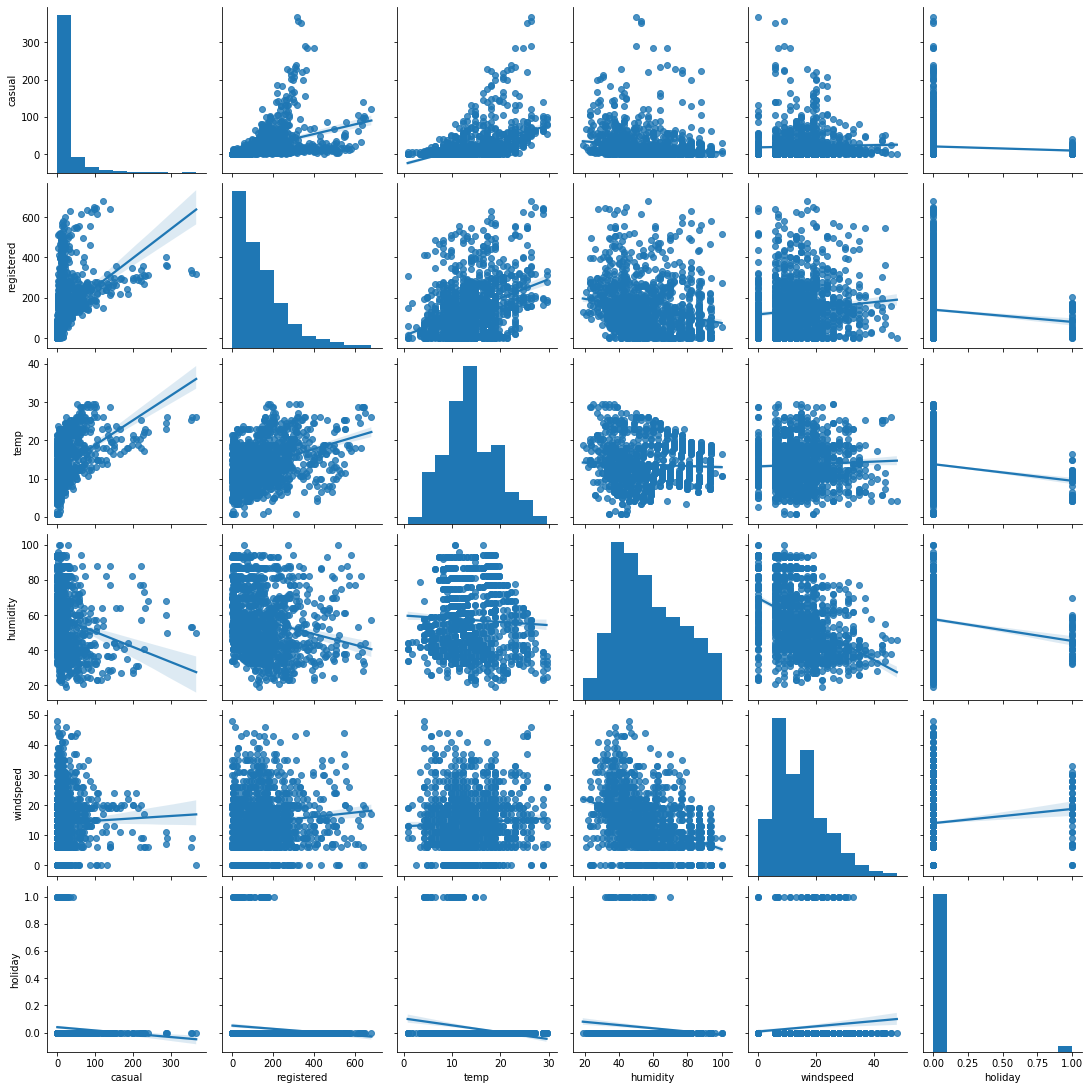

### Train Test Split

In [11]:
X = train.drop(["count","casual","registered"], axis=1)
y = train["count"]

X_train, X_test, y_train, y_test = train_test_split(X[cats], y, train_size=0.8, test_size=0.2, random_state=0)

KeyError: "['year', 'day', 'weekend', 'month', 'hour', 'yday'] not in index"

### Train a model

In [12]:
#
#
# m = LinearRegression()
#
# m.fit(X_train,y_train)
#
# print(m.score(X_train,y_train))